# **Importowanie bibliotek**

In [114]:
import pandas as pd
import numpy as np


!pip install regex
import regex as re

df_tweety = pd.read_csv("/content/dane3_ten_plik - dane3.csv")

!pip install spacy -U
!python -m spacy download pl_core_news_lg

import spacy
nlp = spacy.load("pl_core_news_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **1 część**

In [115]:
#1 Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
df_tweety["created_at"] = [wiersz.replace("Mon","Poniedziałek").replace("Tue","Wtorek").replace("Wed","Środa").replace("Thu","Czwartek").replace("Fri","Piątek").replace("Sat","Sobota").replace("Sun","Niedziela") for wiersz in df_tweety["created_at"]]
print(df_tweety["created_at"]) #dla testu

0       Poniedziałek Jul 05 07:58:09 +0000 2021
1       Poniedziałek Jul 05 08:21:28 +0000 2021
2       Poniedziałek Jul 05 12:50:04 +0000 2021
3       Poniedziałek Jul 05 06:33:46 +0000 2021
4       Poniedziałek Jul 05 11:13:20 +0000 2021
                         ...                   
1945           Środa Jun 30 08:10:33 +0000 2021
1946           Środa Jun 30 08:33:10 +0000 2021
1947           Środa Jun 30 07:17:38 +0000 2021
1948           Środa Jun 30 09:37:47 +0000 2021
1949           Środa Jun 30 07:54:27 +0000 2021
Name: created_at, Length: 1950, dtype: object


In [116]:
#2 Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
df_tweety["user_created_at"] = [wiersz.replace("Jan", "01").replace("Feb", "02").replace("Mar", "03").replace("Apr", "04").replace("May", "05").replace("Jun", "06").replace("Jul", "07").replace("Aug", "08").replace("Sep", "09").replace("Oct", "10").replace("Nov", "11").replace("Dec", "12") for wiersz in df_tweety["user_created_at"]]
print(df_tweety["user_created_at"])

0       Mon 02 08 16:44:23 +0000 2021
1       Wed 07 16 13:54:38 +0000 2014
2       Thu 05 07 21:18:59 +0000 2015
3       Thu 07 27 06:30:20 +0000 2017
4       Mon 03 02 13:22:28 +0000 2015
                    ...              
1945    Mon 08 03 12:49:55 +0000 2020
1946    Sat 06 15 21:33:26 +0000 2019
1947    Sun 08 16 15:31:55 +0000 2009
1948    Thu 02 10 11:46:59 +0000 2011
1949    Fri 06 12 18:04:14 +0000 2020
Name: user_created_at, Length: 1950, dtype: object


In [117]:
#3 Pobierz wszystkie linki do tweetów i przekaż je do listy.
listaZLinkamiDoTweetow = df_tweety['tweet_url'].tolist()
print(listaZLinkamiDoTweetow)

['https://twitter.com/NieOddac/status/1411957559712432128', 'https://twitter.com/MeteoprognozaPL/status/1411963424221941763', 'https://twitter.com/jolaiza29/status/1412031023588708352', 'https://twitter.com/PogodaMeteo/status/1411936323779371013', 'https://twitter.com/WESLEYROBERTART/status/1412006678275448834', 'https://twitter.com/SDGsbot/status/1411946061564985349', 'https://twitter.com/iSokolkaeu/status/1411964452921122816', 'https://twitter.com/Squabercom/status/1412024990497656836', 'https://twitter.com/SolskaAda/status/1411970011992891394', 'https://twitter.com/PogodaMeteo/status/1411996139604357122', 'https://twitter.com/TestateTornado/status/1411993985946734595', 'https://twitter.com/PerfectDilemma2/status/1412029598758588419', 'https://twitter.com/tytus_de_zoo_/status/1412035207608348675', 'https://twitter.com/PogodaMeteo/status/1411968124627324930', 'https://twitter.com/TerazSrodowisko/status/1411976056249237505', 'https://twitter.com/RafalDudkiewic1/status/14120316949374648

In [118]:
#4 - Pobieranie linków z tweetów i przekazywanie ich do listy (kolumna urls)

#WERSJA B - chyba jednak o to chodziło (ale poniżej druga opcja)
listaLinkiZTweetow = []

for element in df_tweety["text"]:
  znajdzLink = re.findall(r'(https?://\S+)', element)
  if len(znajdzLink) != 0:
    for i in range(len(znajdzLink)):
      listaLinkiZTweetow.append(znajdzLink[i])

#print(len(listaLinkiZTweetow))
print(listaLinkiZTweetow)



#WERSJA A - ale chyba jednak nie o to chodziło
# for i in range(len(df_tweety["text"])):
#   znaleziony_link = re.findall(r'(https?://\S+)', df_tweety["text"][i]) #szukam linków w tekście
#   if len(znaleziony_link) != 0: # jeśli znalazłam link, to będę go chciała dodać, w innym przypadku nie ma sensu ruszać innej kolumny
#     if type(df_tweety["urls"][i]) == str or (type(df_tweety["urls"][i]) == list and len(df_tweety["urls"][i]) !=0): #pytchon tu głupieje i raz mi pokazuje typ str, innym razem list, a jeszcze innym float bo nan więc chcę się zabezpieczyć przed błędami
#       znaleziony_link.append(df_tweety["urls"][i]) #łączę ze sobą listy linków
#       df_tweety["urls"][i] = znaleziony_link # podmieniam zawartość w kolumnie na połączoną listę linków
#     else:
#       df_tweety["urls"][i] = znaleziony_link #podmieniam pustą zawartość na znaleziony w tekście link

['https://t.co/xsyokVwH5B', 'https://t.co/PzSh6ly5nA', 'https://t.co/xsyokVwH5B', 'https://t.co/SSuHMmbNRR', 'https://t.co/FNfzOW5bPl', 'https://t.co/wMu4viUDI8', 'https://t.co/jI5EH3dg6w', 'https://t.co/ZbHyBLJXbW', 'https://t.co/Zr1GwBF1g9', 'https://t.co/3zOj2JFYSY', 'https://t.co/Utl5xuKpuN', 'https://t.co/GNPULmEKIC', 'https://t.co/toK4Cuo2M4', 'https://t.co/19wJNUvgpG', 'https://t.co/ZbHyBLJXbW', 'https://t.co/GNPULmEKIC', 'https://t.co/cew5hgPwGG', 'https://t.co/wMu4viUDI8', 'https://t.co/vQsFN4KQEI', 'https://t.co/ZbHyBLJXbW', 'https://t.co/Xa9YqvNW8I', 'https://t.co/XQMfQhNq8o', 'https://t.co/XQMfQhNq8o', 'https://t.co/QxWPNMHIrC', 'https://t.co/r7jmO53I37', 'https://t.co/ksiy0pUYNJ', 'https://t.co/18qbE4M5Ie', 'https://t.co/fiQzL9JAcc', 'https://t.co/ZbHyBLJXbW', 'https://t.co/CNivAiOsTY', 'https://t.co/ZbHyBLJXbW', 'https://t.co/PzSh6ly5nA', 'https://t.co/OVrTS93Ehp', 'https://t.co/ZbHyBLJXbW', 'https://t.co/GNPULmEKIC', 'https://t.co/r7jmO53I37', 'https://t.co/jfUlmoUPAK', 

In [119]:
#5 - Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media)

listaZLinkamiDoObrazkow = []

for wiersz in df_tweety["media"]:
  if type(wiersz) == str:
    listaZLinkamiDoObrazkow.append(wiersz)

print(listaZLinkamiDoObrazkow)

['https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/PogodaMeteo/status/1411936323779371013/photo/1', 'https://twitter.com/Squabercom/status/1412024990497656836/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996139604357122/photo/1', 'https://twitter.com/PogodaMeteo/status/1411968124627324930/photo/1', 'https://twitter.com/PortalMorski/status/1411989284148723712/photo/1', 'https://twitter.com/PogodaMeteo/status/1411996122399358981/photo/1', 'https://twitter.com/FOB_Poland/status/1412008431553290240/photo/1', 'https://twitter.com/PogodaMeteo/status/1411944377715417089/photo/1', 'https://twitter.com/EnamoradaArt/status/1412016277586067456/video/1', 'https://twitter.com/FOB_Poland/status/1412007587890053121/photo/1', 'https://twitter.com/MaciejWolnosc/status/1411997844672815106/photo/1', 'https://twitter.com/PogodaMeteo/status/1412013425824256006/photo/1', 'https://twitter.com/Muzeum_Widzewa/status/1411961774941818886/photo/1', 'https://twitte

In [120]:
#6 Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords


def usunStopWords(tekst):
  nowy_tekst = ""
  doc = nlp(tekst)
  for slowo in doc:
    if slowo.is_stop == False:
      nowy_tekst = nowy_tekst + " " + slowo.text
  return nowy_tekst.strip()

df_tweety["text_without_stopwords"] = df_tweety["text"].apply(usunStopWords)
print(df_tweety["text_without_stopwords"])




0       @ciahol @Robert06270082 @Renata_Grochal @MacBo...
1       @RyszardWojcik @Roberte36015396 @SzczesniakA @...
2       @Kwiatkow_Lipska @krybarczyk23 @PL_2050 @szymo...
3       AutoTweet : Dobowa suma # opad # Polska dniu 2...
4       @Energetyka_24 Człowiek gigantyczny wpływ środ...
                              ...                        
1945    śniadanie tost francuski czarna kawa , zjedzon...
1946    Kanadzie wczoraj gorąco . 48 ° C . \n\n dowód ...
1947    moment Terlecki mówi PiS klimat opuszczenia kl...
1948    Hydraty metanu alternatywne źródło energii , p...
1949    piosenka 100 % Lukowa , siódmym niebie , ulubi...
Name: text_without_stopwords, Length: 1950, dtype: object


# **Część 2**

In [121]:
#zad1 Wypisz top5 tweetów z największa liczbą polubień.

najwiekszeLiczby = df_tweety.nlargest(5, "favorite_count") #szukam największych liczb w kolumnie

indeksyNajwiekszych = najwiekszeLiczby.index #znajduję indeksy dla tych największych liczb

for indeks in indeksyNajwiekszych:
    print("Treść tweetu:" , df_tweety.loc[indeks, "text"]) #wypisuję tweety z największą liczbą polubień
    print() # oddzielam tweety

Treść tweetu: Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące

Treść tweetu: Kalifornia kroliczkiem katastrofy klimatyzmu. Nawet Bloomberg przyznaje, że szaleńczy pęd do zielonej energii doprowadził do masowych wylączeń i awarii Klimatyści swoje, że to klimat,  ale jakoś dziwnie klimat nie powoduje wylączeń w sąsiednich stanach. https://t.co/fcQgFatabz

Treść tweetu: @yahabibtii Pracuje w kawiarni i nieraz jacyś stali klienci przychodzili z laptopem pracować itd, mówili że po prostu u nas w kawiarni jest fajny klimat, że dobrze im się tu pracuje, z resztą też taka osoba zawsze bierze kawę i coś do jedzenia więc myślę że spoko opcja tak raz na jakiś czas

Treść tweetu: Ciekawe, czy upały i pożary w chłodnej Kanadzie, przekonają niektórych, że trzeba chronić klimat?

#kryzysklimatyczny

Treść tweetu: myślę, że klimat https://t.co/uIXNcsyCTW



In [122]:
#zad2 Wypisz top5 tweetów z największa liczbą retweetów.

najwiekszeLiczby = df_tweety.nlargest(5, "retweet_count")

indeksyNajwiekszych = najwiekszeLiczby.index

for indeks in indeksyNajwiekszych:
    print(df_tweety.loc[indeks, "text"])

# sprawdzałam plik z danymi - faktycznie ten tweet jest powielony masę razy w tym zestawie danych (występuje 333 razy)

Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące
Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące
Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące
Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące
Imagine pójść na pierwsza randkę z dziewczyna na jakiś wiejski festyn. Czujesz ten klimat? Dmuchane zamki, pełno emerytów, polskie hity lat 90, zapach wiejskiego gowna i najtańszy browar na łące


In [123]:
#zad3 Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).

for i in range(len(df_tweety["text"])):
  if df_tweety["possibly_sensitive"][i] == False:
    print("Treść tweetu:", df_tweety["text"][i])
    print()

Treść tweetu: AutoTweet: Dobowa suma #opad w #Polska w dniu 2021-07-04. Źródło: @IMGWmeteo #pogoda #klimat https://t.co/xsyokVwH5B

Treść tweetu: AutoTweet: Dobowa suma #opad w #Polska w dniu 2021-07-04. Źródło: @IMGWmeteo #pogoda #klimat https://t.co/xsyokVwH5B

Treść tweetu: Jaki jest klimat rynkowy?
Co ciekawego może się wydarzyć w lipcu?
Co ma wpływ na rekordy na indeksie WIG?
Ile będzie trzeba czekać na kolejne wielkie debiuty giełdowe?
Sprawdź w nowym Magazynie Bilans ⬇⬇
https://t.co/SSuHMmbNRR
#akcje #inwestycje #giełda https://t.co/FNfzOW5bPl

Treść tweetu: AutoTweet: Temperatura powierzchni południowego Bałtyku w ostatnich latach. Źródło: @CMEMS_EU, produkt: DMI-BALTIC-SST-L4-NRT. Więcej informacji: https://t.co/wMu4viUDI8 #pogoda #klimat #Bałtyk #morze #temperatura https://t.co/jI5EH3dg6w

Treść tweetu: Ale mi przykro :( w sensie no gratuluję chłopakom, ale Kill my mind ma taki zajebisty rockowy klimat, fajnie by było :( i jeszcze Louis, fan piłki, szkoda :( https://t.co/Zr1G

In [124]:
#zad4 Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).
from datetime import datetime

najwczesniejszaData = None
najwczesniejszeId = None
for i in range(len(df_tweety["user_created_at"])):
  konwersja = datetime.strptime(df_tweety["user_created_at"][i], "%a %m %d %H:%M:%S %z %Y")
  if najwczesniejszaData is None or konwersja < najwczesniejszaData:
    najwczesniejszaData = konwersja
    najwczesniejszeId = df_tweety["user_id"][i]

for i in range(len(df_tweety["user_id"])):
  if df_tweety["user_id"][i] == najwczesniejszeId:
    print(df_tweety["text"][i])

Trochę ostrzejszy klimat u nas ale właśnie może czas na zadaszone ścieżki 👇👍 https://t.co/kf1aZSfDqF


In [125]:
#zad5 Wyświetl tweety użytkownika. który ma najwięcej followersów.

najwiekszaLiczbaFollowersow = df_tweety["user_followers_count"].max()

for i in range(len(df_tweety["user_followers_count"])):
  if df_tweety["user_followers_count"][i] == najwiekszaLiczbaFollowersow:
    print("Treść tweeta:", df_tweety["text"][i])
    print()

Treść tweeta: Fala upałów w #Kanada i #USA. Setki ofiar hipertermii #pogoda #klimat 

https://t.co/dXYmBIkFAt

Treść tweeta: #Banki dopłacą do pieców, jeśli zdecydujemy się na #kredyt 

https://t.co/LbfRpgsyqS

Treść tweeta: 49,5 stopnia Celsjusza w mieście #Kanada. Przed tym tygodniem w Kanadzie nigdy nie zanotowano temperatury wyższej niż 45 stopni Celsjusza #pogoda #klimat 

https://t.co/1RtJbvnJ5V



In [126]:
#zad6 Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)

listaZweryfikowanychUzytkownikow = []

for i in range(len(df_tweety["user_verified"])):
  if (df_tweety["user_verified"][i] == True) and (df_tweety["user_name"][i] not in listaZweryfikowanychUzytkownikow):
    print("Zweryfikowany użytkownik:", df_tweety["user_name"][i])
    listaZweryfikowanychUzytkownikow.append(df_tweety["user_name"][i])




Zweryfikowany użytkownik: Maciej Lasek
Zweryfikowany użytkownik: Dziennik.pl
Zweryfikowany użytkownik: Jan Mosiński
Zweryfikowany użytkownik: Witold Zembaczyński🇵🇱
Zweryfikowany użytkownik: Kowal
Zweryfikowany użytkownik: Katarzyna Lubnauer
Zweryfikowany użytkownik: Agnieszka Hanajczyk
Zweryfikowany użytkownik: Ministerstwo Klimatu i Środowiska
Zweryfikowany użytkownik: Ireneusz Zyska
Zweryfikowany użytkownik: Ministerstwo Funduszy i Polityki Regionalnej
Zweryfikowany użytkownik: Rzeczpospolita
Zweryfikowany użytkownik: Grzegorz Nawacki
Zweryfikowany użytkownik: Michał Potocki


In [127]:
#zad7 Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu

poniedzialki = 0
wtorki = 0
srody = 0
czwartki = 0
piatki = 0
soboty = 0
niedziele = 0

for date in df_tweety["created_at"]:
    # Sprawdź, czy data zawiera "Mon" lub "poniedziałek"
    if "Mon" in date or "Poniedziałek" in date:
        poniedzialki += 1
    elif "Tue" in date or "wtorek" in date:
        wtorki += 1
    elif "Wed" in date or "środa" in date:
        srody += 1
    elif "Thu" in date or "czwartek" in date:
        czwartki += 1
    elif "Fri" in date or "piątek" in date:
        piatki += 1
    elif "Sat" in date or "sobota" in date:
        soboty += 1
    elif "Sun" in date or "niedziela" in date:
        niedziele += 1


znajdzNajwiekszaLiczbe = max(poniedzialki, wtorki, srody, czwartki, piatki, soboty, niedziele)

if znajdzNajwiekszaLiczbe == poniedzialki:
    print("Tweety były publikowane najczęściej w poniedziałki.")
elif znajdzNajwiekszaLiczbe == wtorki:
    print("Tweety były publikowane najczęściej we wtorki.")
elif znajdzNajwiekszaLiczbe == srody:
    print("Tweety były publikowane najczęściej w środy.")
elif znajdzNajwiekszaLiczbe == czwartki:
    print("Tweety były publikowane najczęściej w czwartki.")
elif znajdzNajwiekszaLiczbe == piatki:
    print("Tweety były publikowane najczęściej w piątki.")
elif znajdzNajwiekszaLiczbe == soboty:
    print("Tweety były publikowane najczęściej w soboty.", znajdzNajwiekszaLiczbe ,"<- liczba tweetow z sobót")
elif znajdzNajwiekszaLiczbe == niedziele:
    print("Tweety były publikowane najczęściej w niedziele.")

Tweety były publikowane najczęściej w poniedziałki.


# **Część 3**

In [129]:
#zad 1 Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons

def znajdzOsoby(tekst):
  tekstZOsobami= ""
  doc = nlp(tekst)
  for slowo in doc.ents:
    if slowo.label_ == "persName":
      tekstZOsobami = tekstZOsobami + " " + slowo.text
  return tekstZOsobami.strip()

df_tweety["persons"] = df_tweety["text"].apply(znajdzOsoby)

print(df_tweety["persons"])

0                 Rozenka Treli
1                              
2                       Macieju
3                     AutoTweet
4                              
                 ...           
1945                           
1946    https://t.co/WHo1xXGM6P
1947                   Terlecki
1948                           
1949                     Lukowa
Name: persons, Length: 1950, dtype: object


In [131]:
#zad 2 Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places

def znajdzMiejsca(tekst):
  tekstZMiejscami= ""
  doc = nlp(tekst)
  for slowo in doc.ents:
    if slowo.label_ == "placeName":
      tekstZMiejscami = tekstZMiejscami + " " + slowo.text
  return tekstZMiejscami.strip()

df_tweety["places"] = df_tweety["text"].apply(znajdzMiejsca)

print(df_tweety["places"])

0                        
1                        
2        @Kwiatkow_Lipska
3                  Polska
4                        
              ...        
1945            francuski
1946    Kanadzie Kanadzie
1947                     
1948                     
1949                     
Name: places, Length: 1950, dtype: object


In [133]:
#zad 3 Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

def znajdzOrganizacje(tekst):
  tekstZOrganizacjami= ""
  doc = nlp(tekst)
  for slowo in doc.ents:
    if slowo.label_ == "orgName":
      tekstZOrganizacjami = tekstZOrganizacjami + " " + slowo.text
  return tekstZOrganizacjami.strip()

df_tweety["organizations"] = df_tweety["text"].apply(znajdzOrganizacje)
print(df_tweety["organizations"])

0       Demokraci PSL
1                    
2                    
3                    
4                    
            ...      
1945                 
1946                 
1947              PiS
1948                 
1949                 
Name: organizations, Length: 1950, dtype: object


# **Część 4**

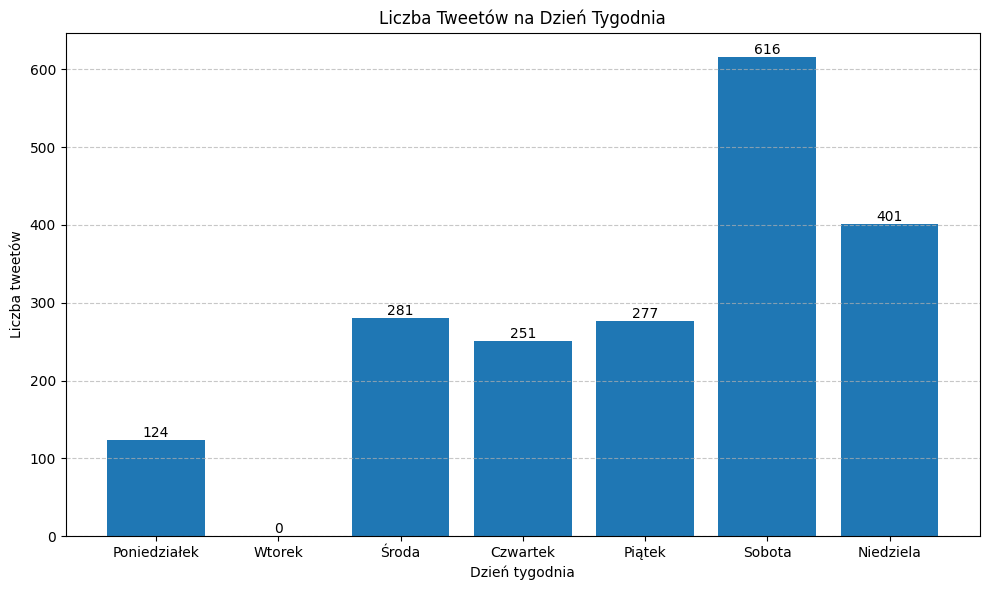

In [135]:
# Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia
# tu potrzebne są dane z zad 7 z części 2
import matplotlib.pyplot as plt


poniedzialki = 0
wtorki = 0
srody = 0
czwartki = 0
piatki = 0
soboty = 0
niedziele = 0

for date in df_tweety["created_at"]:
    if "Mon" in date or "Poniedziałek" in date:
        poniedzialki += 1
    elif "Tue" in date or "Wtorek" in date:
        wtorki += 1
    elif "Wed" in date or "Środa" in date:
        srody += 1
    elif "Thu" in date or "Czwartek" in date:
        czwartki += 1
    elif "Fri" in date or "Piątek" in date:
        piatki += 1
    elif "Sat" in date or "Sobota" in date:
        soboty += 1
    elif "Sun" in date or "Niedziela" in date:
        niedziele += 1


dniTygodnia = ["Poniedziałek", "Wtorek", "Środa", "Czwartek", "Piątek", "Sobota", "Niedziela"]
liczbaTweetow = [poniedzialki, wtorki, srody, czwartki, piatki, soboty, niedziele]


# Tworzenie wykresu
plt.figure(figsize=(10, 6))
bars = plt.bar(dniTygodnia, liczbaTweetow)

# Dodawanie wartości nad słupkami
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), liczbaTweetow[i], ha="center", va="bottom")

# Ustawienia wykresu
plt.title('Liczba Tweetów na Dzień Tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()